Refer to the requirements.yml file to reproduce the same conda env used in this Notebook. Using latest versions of Astropy, photutils, matplotlib and scipy.

Imports and matplotlib inline. 

In [1]:
%matplotlib inline

import numpy as np

from galclean import galclean, plot_result, galshow
from matplotlib import pyplot as plt
from astropy.io import fits

OBS: Warnings are thrown by PhotUtils due to a recent update in Astropy. Galclean does not use iters explictly, so this warning should disappear when photutils get an update. 

Load EFIGI galaxy image from fits (EFIGI dataset available at https://www.astromatic.net/projects/efigi)

In [2]:
galaxy_data = fits.getdata('data/example.fits')

Show galaxy image with top 0.5% clip

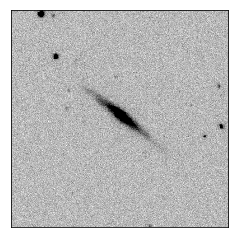

In [3]:
galshow(galaxy_data)

Remove bright sources (3 std above sky background) from galaxy image using galclean

In [ ]:
segmented_galaxy = galclean(galaxy_data)

Show resulting segmented image, the original and what as removed

In [ ]:
plot_result(galaxy_data, segmented_galaxy)

It is possible to change the standard background threshold to change the extraction results. As an example, we can extract only very bright objects (siglevel = 5)

In [ ]:
segmented_galaxy_5std = galclean(galaxy_data, 5)
plot_result(galaxy_data, segmented_galaxy_5std)

It is also possible to change the source detection minimum size with the min_size keyword. It uses 1% of the image size as default. The image go through an upscaling process (up 4x) before source detection, this means that sources with $(4\times N \times min\_size)^2$ pixels or more are detected. For our example, $N=255$. In the default case, this represents $104$ pixels. If we lower this limit to 0.5%, the number of pixels threshold goes to $26$ pixels and galclean is supposed to find smaller sources as shown below

In [ ]:
segmented_galaxy = galclean(galaxy_data, 3, min_size=0.005)
plot_result(galaxy_data, segmented_galaxy)